In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## **Exercice 1 :**

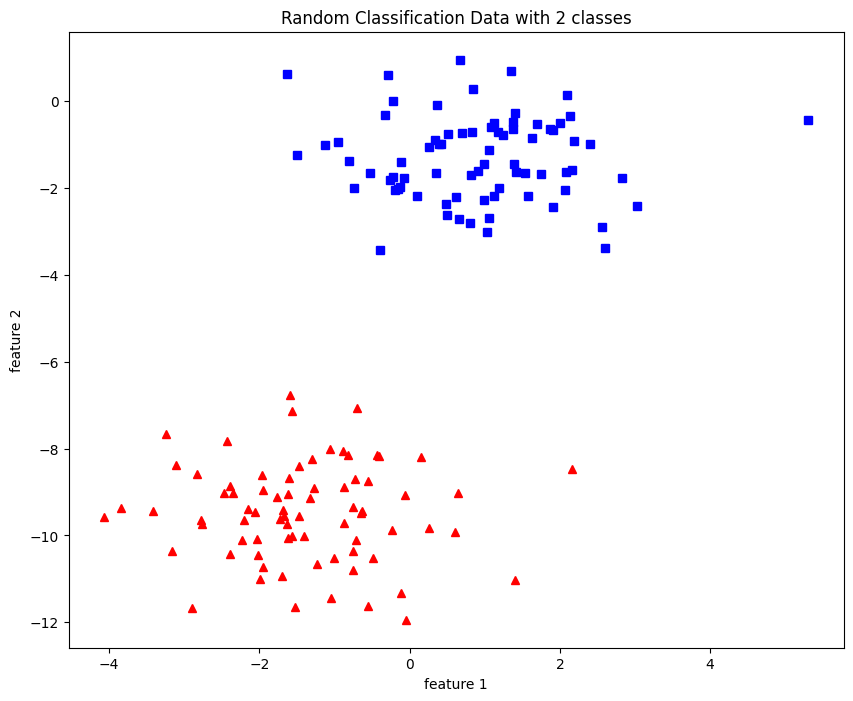

In [103]:
X, y = datasets.make_blobs (n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plt.show()

Il y a deux classes, rouge et bleue, et nous voulons les séparer en traçant une ligne droite entre elles. Ou, plus formellement, nous voulons apprendre un ensemble de paramètres wi pour trouver un hyperplan optimal (ligne droite pour nos données) qui sépare les deux classes.

#### Coder la fonction d’activation de Heaviside

In [104]:
def acti_func(z):
    return 1 if z > 0 else 0

#### Implémenter l'algorithme de perceptron

In [105]:
def perceptron(X, y, lr, epochs):
    # X --> Inputs. y --> labels/target. lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples n-> number of features
    m, n = X.shape

    # Initializing parameters(theta) to zeros. # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))

    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []

    # Training.
    for epoch in range(epochs):
        # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias,
            X0 = 1
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr * (y[idx] - np.squeeze(y_hat)) * x_i
                n_miss += 1
            # Appending number of misclassified examples at every iteration.
            n_miss_list.append(n_miss)
    return w, n_miss_list

#### Fonction de traçage de la limite de décision

In [106]:
def plot_decision_boundary(X, w):
    # X --> Inputs # w --> parameters
    # The Line is y=mx+c
    # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2 // mx = (w1,w2)(x1,x2)
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m * x1 + c
    # Tracer la ligne jaune représentant la limite de décision
    plt.plot(x1, x2, 'y-')

#### Appliquer Perceptron sur le DataSet

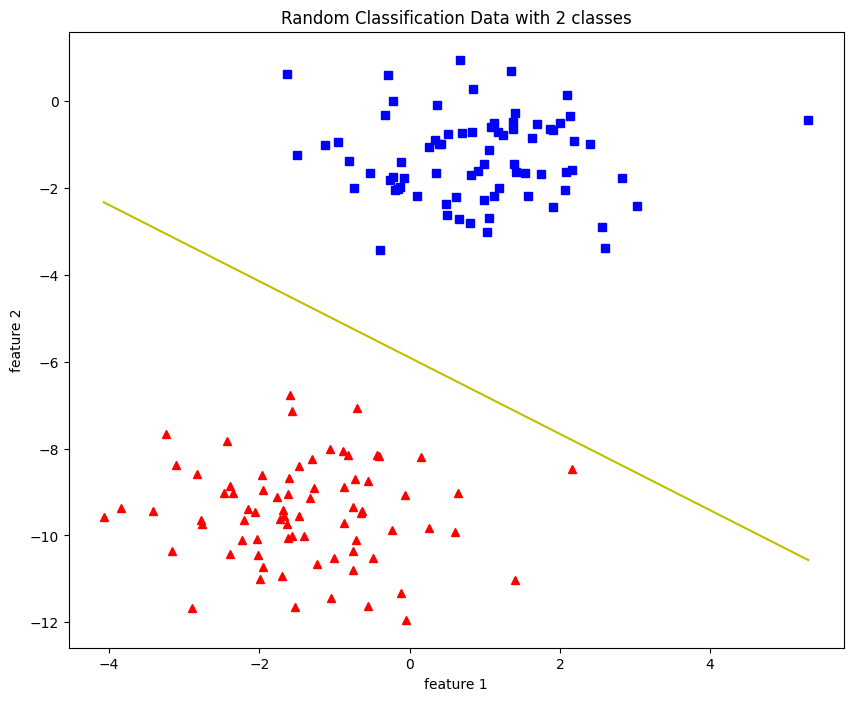

In [107]:
X, y = datasets.make_blobs (n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

# Entraîner le perceptron
lr = 0.1
epochs = 10
w, n_miss_list = perceptron(X, y, lr, epochs)

# Tracer la limite de décision
plot_decision_boundary(X, w)
plt.show()

## **Exercice 2 :**

In [108]:
def activation_func(z):
    return 1 if z > 0 else 0

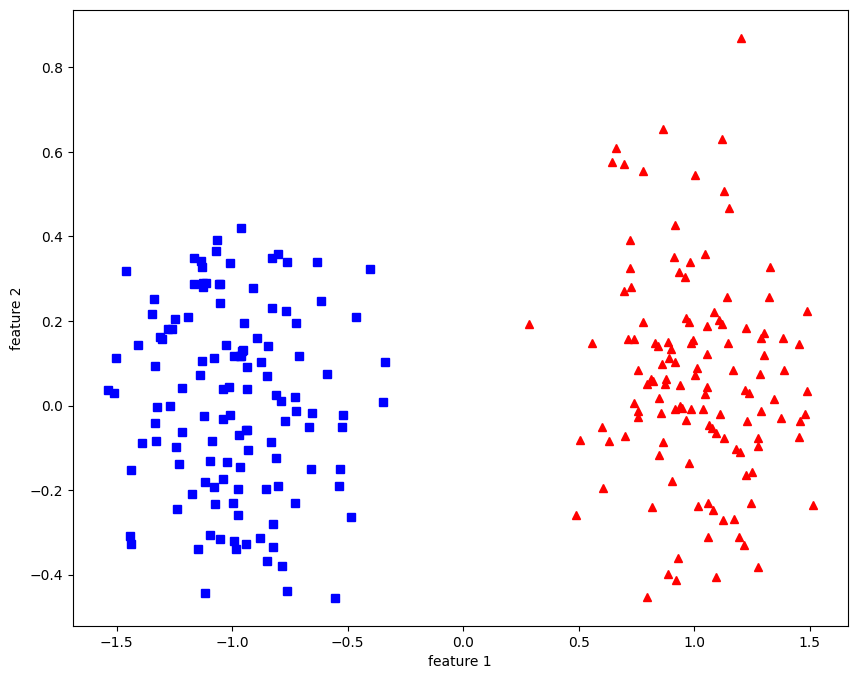

In [109]:
mu1 = [-1, 0]
mu2 = [1, 0]
sigma = 0.25
n_samples = 125

# Générer les données pour les deux classes qui suit Normal
X1 = np.random.normal(mu1, sigma, (n_samples, 2))
X2 = np.random.normal(mu2, sigma, (n_samples, 2))
y1 = np.ones(n_samples)
y2 = np.zeros(n_samples)

# Fusionner les datasets
X = np.vstack((X1, X2))
y = np.concatenate((y1, y2))

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()


## Expérience 1 :

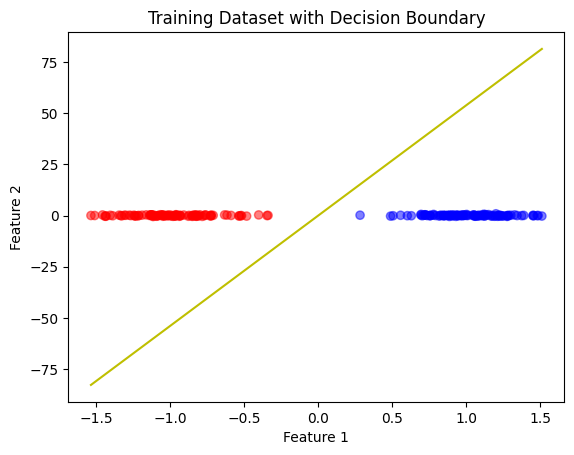

Accuracy on test set: 1.00


In [110]:
# Mélanger et diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le perceptron sur l'ensemble d'entraînement
w, n_miss_list = perceptron(X_train, y_train, lr=0.1, epochs=10)
plot_decision_boundary(X_train, w)
# Tracer la limite de décision sur l'ensemble d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.5)
plt.title('Training Dataset with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculer et afficher la précision sur l'ensemble de test
predictions = np.array([activation_func(np.dot(np.insert(x_i, 0, 1), w)) for x_i in X_test])
accuracy = np.mean(predictions == y_test)
print(f'Accuracy on test set: {accuracy:.2f}')


## Expérience 2 :

In [111]:
# Paramètres des distributions
mu1 = [-1, 0]
mu2 = [1, 0]
sigma = 0.75
n_samples = 125

# Générer les données pour les deux classes
X1 = np.random.normal(mu1, sigma, (n_samples, 2))
y1 = np.zeros(n_samples)
X2 = np.random.normal(mu2, sigma, (n_samples, 2))
y2 = np.ones(n_samples)

# Fusionner les datasets
X = np.vstack((X1, X2))
y = np.concatenate((y1, y2))

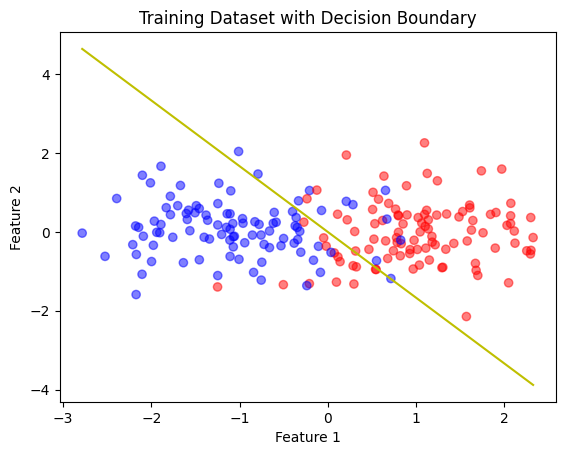

Accuracy on test set: 0.80 , miss-classsified 24


In [112]:
# Mélanger et diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le perceptron sur l'ensemble d'entraînement
w, n_miss_list = perceptron(X_train, y_train, lr=0.1, epochs=10)

# Tracer la limite de décision sur l'ensemble d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.5)
plot_decision_boundary(X_train, w)
plt.title('Training Dataset with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculer et afficher la précision sur l'ensemble de test
predictions = np.array([activation_func(np.dot(np.insert(x_i, 0, 1), w)) for x_i in X_test])
accuracy = np.mean(predictions == y_test)
print(f'Accuracy on test set: {accuracy:.2f} , miss-classsified {n_miss_list[-1]}')


## Expérience 3 :

In [113]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros(n+1)
    for epoch in range(epochs):
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1)
            y_hat = activation_func(np.dot(w, x_i))
            if (y_hat - y[idx]) != 0:
                w += lr * (y[idx] - y_hat) * x_i
    return w

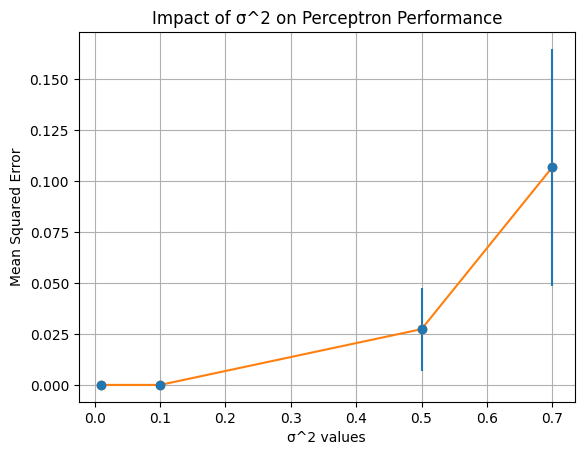

In [114]:
mu1 = [-1, 0]
mu2 = [1, 0]
n_samples = 125

sigma_values = [0.01, 0.1, 0.5, 0.7]
nb_experiments = 30

errors = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(nb_experiments):
        X1 = np.random.normal(mu1, sigma, (n_samples, 2))
        y1 = np.zeros(n_samples)
        X2 = np.random.normal(mu2, sigma, (n_samples, 2))
        y2 = np.ones(n_samples)

        X = np.vstack((X1, X2))
        y = np.concatenate((y1, y2))

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        w = perceptron(X_train, y_train, lr=0.1, epochs=10)
        predictions = np.array([activation_func(np.dot(np.insert(x_i, 0, 1), w)) for x_i in X_test])
        error = mean_squared_error(y_test, predictions)
        errors[sigma].append(error)

means = [np.mean(errors[sigma]) for sigma in sigma_values]
variances = [np.var(errors[sigma]) for sigma in sigma_values]

plt.errorbar(sigma_values, means, yerr=np.sqrt(variances), fmt='o')
plt.plot(sigma_values, means, '-o')
plt.title('Impact of σ^2 on Perceptron Performance')
plt.xlabel('σ^2 values')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()